In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load

In [3]:
df_train = pd.read_csv('./Data/smoker_train.csv', index_col=0)
df_test = pd.read_csv('./Data/smoker_test.csv', index_col=0)

In [4]:
df_train.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [5]:
X_train = df_train.drop('smoking', axis=1)
y_train = df_train['smoking']
X_test = df_test

In [6]:
X, y = X_train, y_train

In [7]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### XG Boost Classification

In [7]:
xgbm = XGBClassifier(random_state=42)

params = {'max_depth': [2,3,4,5,6,None],
          'learning_rate':np.linspace(0.001, 0.999, 10),
          'n_estimators':[50, 100, 150]}

gcv_xgbm = GridSearchCV(xgbm, param_grid=params,verbose=3, cv=kfold, scoring='neg_log_loss')
gcv_xgbm.fit(X, y)

bm_xgbm = gcv_xgbm.best_estimator_

# Saving the model to a file
dump(bm_xgbm, 'xgbm.joblib')

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=-0.672 total time=   1.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=-0.672 total time=   1.4s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=-0.672 total time=   1.7s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=-0.672 total time=   1.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=-0.672 total time=   1.4s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=-0.660 total time=   2.6s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=-0.660 total time=   2.1s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=-0.659 total time=   1.9s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=-0.660 total time=   2.3s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=

['xgbm.joblib']

In [8]:
print(gcv_xgbm.best_params_)
print(gcv_xgbm.best_score_)

{'learning_rate': 0.22277777777777777, 'max_depth': 5, 'n_estimators': 150}
-0.44274658501020314


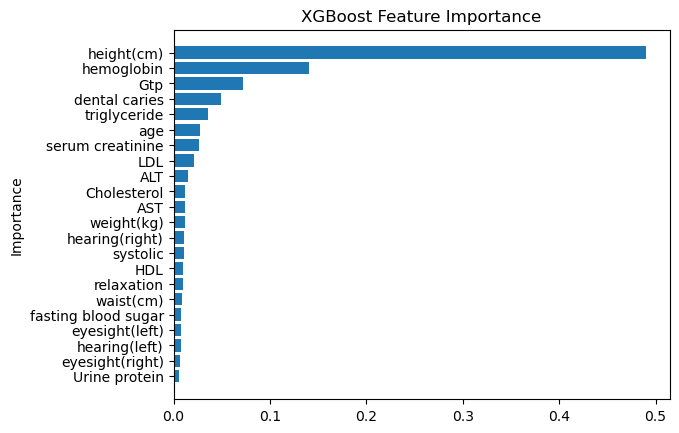

In [9]:
df_imp = pd.DataFrame({ 'variable':bm_xgbm.feature_names_in_,
                        'importance':bm_xgbm.feature_importances_})

df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by='importance')
plt.barh(df_imp['variable'] ,df_imp['importance'])
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance")
plt.show()

In [10]:
y_pred_prob = bm_xgbm.predict_proba(X_test)[:,1]

df_xgbm = pd.DataFrame({
    'id': df_test.index,
    'smoking': y_pred_prob
})
df_xgbm.to_csv('submission_xgbm.csv', index=False)

### Light GBM

In [11]:
lgbm = LGBMClassifier(random_state=42)
params = {'max_depth': [2,3,4,5,6,None],
          'learning_rate':np.linspace(0.001, 0.999, 10),
          'n_estimators':[50, 100, 150]}

gcv_lgbm = GridSearchCV(lgbm, param_grid=params,verbose=3, cv=kfold, scoring='neg_log_loss')
gcv_lgbm.fit(X, y)

bm_lgbm = gcv_lgbm.best_estimator_

# Saving the model to a file
dump(bm_lgbm, 'lgbm.joblib')

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=-0.672 total time=   1.1s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=-0.672 total time=   1.5s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=-0.672 total time=   2.4s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=-0.672 total time=   1.1s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=-0.672 total time=   2.2s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=-0.660 total time=   1.8s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=-0.660 total time=   2.1s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=-0.659 total time=   2.0s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=-0.660 total time=   1.9s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=

['lgbm.joblib']

In [12]:
print(gcv_lgbm.best_params_)
print(gcv_lgbm.best_score_)

{'learning_rate': 0.11188888888888888, 'max_depth': 6, 'n_estimators': 150}
-0.44295610762013765


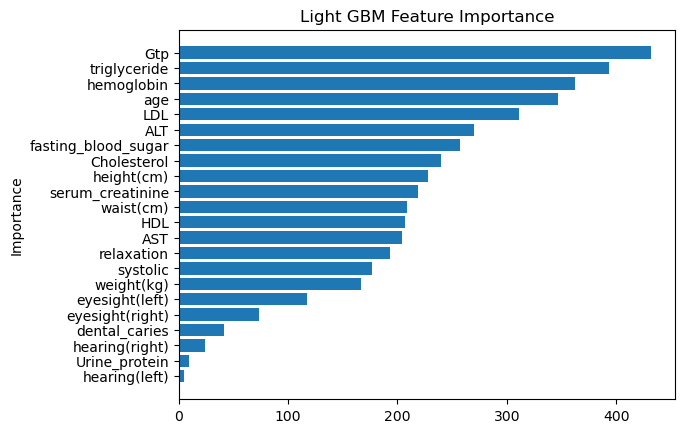

In [13]:
df_imp = pd.DataFrame({ 'variable':bm_lgbm.feature_name_,
                        'importance':bm_lgbm.feature_importances_})

df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by='importance')
plt.barh(df_imp['variable'] ,df_imp['importance'])
plt.title("Light GBM Feature Importance")
plt.ylabel("Importance")
plt.show()

In [14]:
y_pred_prob = bm_lgbm.predict_proba(X_test)[:,1]

df_lgbm = pd.DataFrame({
    'id': df_test.index,
    'smoking': y_pred_prob
})
df_lgbm.to_csv('submission_lgbm.csv', index=False)

### Cat Boost

In [9]:
cgbm = CatBoostClassifier(random_state=42)
params = {'max_depth': [2,3,4,5,6,None],
          'learning_rate':np.linspace(0.001, 0.999, 10),
          'n_estimators':[50, 100, 150]}

gcv_cgbm = GridSearchCV(cgbm, param_grid=params,verbose=3,
                   cv=kfold, scoring='neg_log_loss')
gcv_cgbm.fit(X, y)

print(gcv_cgbm.best_params_)
print(gcv_cgbm.best_score_)

bm_cgbm = gcv_cgbm.best_estimator_

# Saving the model to a file
dump(bm_cgbm, 'cgbm.joblib')

Fitting 5 folds for each of 180 candidates, totalling 900 fits
0:	learn: 0.6927596	total: 66.2ms	remaining: 3.24s
1:	learn: 0.6923715	total: 76.5ms	remaining: 1.83s
2:	learn: 0.6919717	total: 85ms	remaining: 1.33s
3:	learn: 0.6915787	total: 92ms	remaining: 1.06s
4:	learn: 0.6912080	total: 99.3ms	remaining: 894ms
5:	learn: 0.6908217	total: 108ms	remaining: 792ms
6:	learn: 0.6904438	total: 116ms	remaining: 712ms
7:	learn: 0.6900584	total: 123ms	remaining: 643ms
8:	learn: 0.6896873	total: 131ms	remaining: 597ms
9:	learn: 0.6892916	total: 140ms	remaining: 558ms
10:	learn: 0.6889172	total: 147ms	remaining: 521ms
11:	learn: 0.6885375	total: 153ms	remaining: 486ms
12:	learn: 0.6881536	total: 161ms	remaining: 457ms
13:	learn: 0.6877815	total: 172ms	remaining: 441ms
14:	learn: 0.6873888	total: 179ms	remaining: 419ms
15:	learn: 0.6870281	total: 186ms	remaining: 396ms
16:	learn: 0.6866433	total: 194ms	remaining: 376ms
17:	learn: 0.6862778	total: 200ms	remaining: 356ms
18:	learn: 0.6859026	total: 

['cgbm.joblib']

In [10]:
bm_cgbm = load('cgbm.joblib')

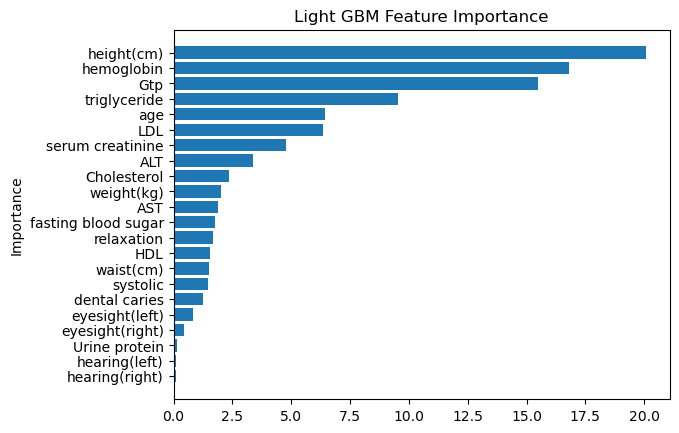

In [11]:
df_imp = pd.DataFrame({ 'variable':bm_cgbm.feature_names_,
                        'importance':bm_cgbm.feature_importances_})

df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by='importance')
plt.barh(df_imp['variable'] ,df_imp['importance'])
plt.title("Light GBM Feature Importance")
plt.ylabel("Importance")
plt.show()

In [48]:
y_pred_prob = bm_cgbm.predict_proba(X_test)[:,1]

df_cgbm = pd.DataFrame({
    'id': df_test.index,
    'smoking': y_pred_prob
})
df_cgbm.to_csv('submission_cgbm.csv', index=False)